<a href="https://colab.research.google.com/github/poudelef/Hierarchy-Model/blob/main/STFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Are we using a GPU?
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# asking persmission for drive to access files
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I used this code to convert the data into test and train sets
----------------------------------------------------------------


In [ ]:
# import os
# import random
# import shutil
# from pathlib import Path

# # ====== CONFIG ======
# SOURCE_DIR = Path(r"/content/drive/MyDrive/DeepLearning_data_2type_auto")   # e.g. .../data  with subfolders cars/, bike/, plane/
# OUT_DIR    = Path(r"/content/drive/MyDrive/DeepLearning_data_2type_auto")        # a parent folder where train/ and test/ will be created
# CLASSES    = ['Apenea', 'CSA', 'Hypopnea', 'OSA', 'MSA']       # class folder names inside SOURCE_DIR
# TRAIN_RATIO = 0.7                            # 70% train / 30% test
# MOVE_FILES = False                           # set True to move instead of copy
# RANDOM_SEED = 42
# # ====================

# random.seed(RANDOM_SEED) # ensures the shuffle is always the same each run

# # Check if a file is an image
# def is_image(p: Path) -> bool:
#     return p.is_file() and p.suffix.lower() in {
#         ".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"
#     }

# def ensure_clean_dir(p: Path):
#     p.mkdir(parents=True, exist_ok=True)

# def split_and_copy(class_name: str):
#     src_class_dir = SOURCE_DIR / class_name
#     if not src_class_dir.exists():
#         print(f"[WARN] Missing class folder: {src_class_dir}")
#         return

#     imgs = [p for p in src_class_dir.iterdir() if is_image(p)]
#     if not imgs:
#         print(f"[WARN] No images found in {src_class_dir}")
#         return

#     random.shuffle(imgs)
#     n = len(imgs)
#     n_train = int(n * TRAIN_RATIO)
#     # Guarantee at least one test image if there are >= 2 total
#     if n - n_train == 0 and n >= 2:
#         n_train = n - 1

#     train_imgs = imgs[:n_train]
#     test_imgs  = imgs[n_train:]

#     # Dest folders
#     train_dst = OUT_DIR / "train" / class_name
#     test_dst  = OUT_DIR / "test" / class_name
#     ensure_clean_dir(train_dst)
#     ensure_clean_dir(test_dst)

#     # Copy or move
#     op = shutil.move if MOVE_FILES else shutil.copy2
#     for p in train_imgs:
#         op(str(p), str(train_dst / p.name))
#     for p in test_imgs:
#         op(str(p), str(test_dst / p.name))

#     print(f"[OK] {class_name}: {len(train_imgs)} → train, {len(test_imgs)} → test (total {n})")

# def main():
#     ensure_clean_dir(OUT_DIR / "train")
#     ensure_clean_dir(OUT_DIR / "test")
#     for c in CLASSES:
#         split_and_copy(c)
#     print("\nDone.")

# if __name__ == "__main__":
#     main()


----------------------------------------------------------------

In [ ]:
import os
path = "/content/drive/MyDrive/DeepLearning_data_2type_auto"
os.listdir(path)

['train',
 'test',
 'HSN_1_train',
 'HSN_1_test',
 'Main',
 'HSA_2_test',
 'HSA_2_train',
 'models',
 '.ipynb_checkpoints']

In [ ]:
# Walk through training data directory and list number of files
for dirpath, dirnames, filenames in os.walk(path+"/train"):
  print(f"There are {len(filenames)} images in '{dirpath}'.")

There are 0 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train'.
There are 2454 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/OSA'.
There are 468 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/MSA'.
There are 679 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/CSA'.
There are 1376 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/Hypopnea'.
There are 4305 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/train/Apenea'.


In [ ]:
# Walk through testing data directory and list number of files
for dirpath, dirnames, filenames in os.walk(path+"/test"):
  print(f"There are {len(filenames)} images in '{dirpath}")

There are 0 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test
There are 1846 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/Apenea
There are 292 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/CSA
There are 590 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/Hypopnea
There are 1053 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/OSA
There are 201 images in '/content/drive/MyDrive/DeepLearning_data_2type_auto/test/MSA


In [ ]:
train_dir = path +"/train"
test_dir = path+"/test"

### Loading Date into Tensorflow Compatable format

#### Directory Structure Needed
```
main_directory/
  class_a/
    a_image_1.jpg
    a_image_2.jpg
  class_b/
    b_image_1.jpg
    b_image_2.jpg
```

```
TensorFlow will:

1. Detect subfolders (class_a, class_b) as labels.
2. Load the images.
3. Return a dataset you can feed into a model.

Supported image formats: .jpeg, .jpg, .png, .bmp, .gif
```


Checkout for more detail: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
import tensorflow as tf
IMG_SIZE = (256,256)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, # Main Path
                                                                 batch_size=BATCH_SIZE, # many images per batch
                                                                 image_size=IMG_SIZE, # Target size of the image (has to be consistent)
                                                                 label_mode="categorical", # catrgorical data
                                                                 shuffle=True,) # mix
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 shuffle=True,)

Found 9282 files belonging to 5 classes.
Found 3982 files belonging to 5 classes.


In [ ]:
# # Images is represented as pixal value and labes as one hot encoded
# for images, labels in train_data.take(1):
#   print(images, lables)

tf.Tensor(
[[[[ 47.180054   86.15304    45.94488  ]
   [ 58.848625   79.35498    20.489857 ]
   [ 80.08555    79.12039    14.912968 ]
   ...
   [ 23.324764   91.0936     30.782032 ]
   [ 25.600124   99.35642    23.395454 ]
   [ 67.23766    92.46927    58.853554 ]]

  [[ 64.110855  114.76272    53.763733 ]
   [208.77243   238.14113   102.393715 ]
   [237.6236    239.69296    59.734528 ]
   ...
   [126.44203   239.29344   155.15437  ]
   [149.77507   241.60397   136.58939  ]
   [ 85.433624  115.260765   74.00297  ]]

  [[ 59.786953  121.18555    43.32117  ]
   [213.20563   251.43906    69.234055 ]
   [243.27814   249.82812    11.746487 ]
   ...
   [106.05      252.3875    145.71054  ]
   [137.96384   246.64      122.27524  ]
   [ 79.9868    119.46711    65.554535 ]]

  ...

  [[ 59.065548  121.73078    43.22797  ]
   [209.59758   248.0268     63.72797  ]
   [238.54337   250.15742    11.74453  ]
   ...
   [101.2793    253.09062   145.12305  ]
   [130.7054    252.1318    115.42383  ]
   [ 

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  plt.show()
  return img


Image shape: (343, 436, 3)


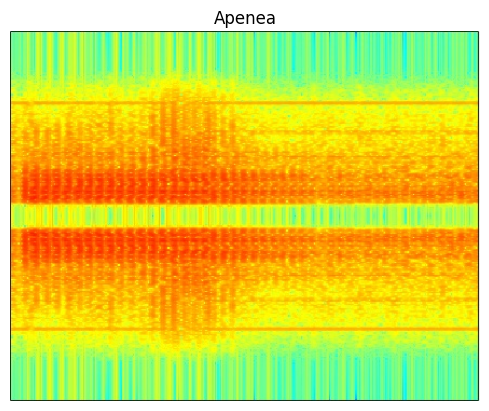

Image shape: (343, 434, 3)


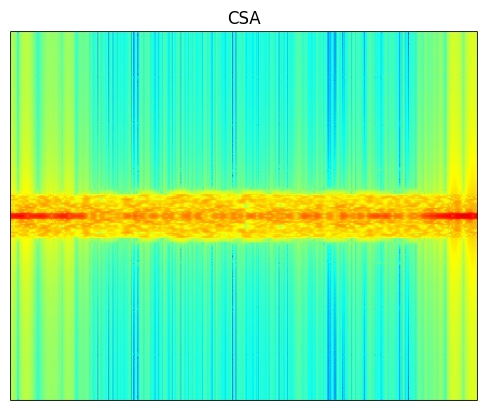

Image shape: (343, 435, 3)


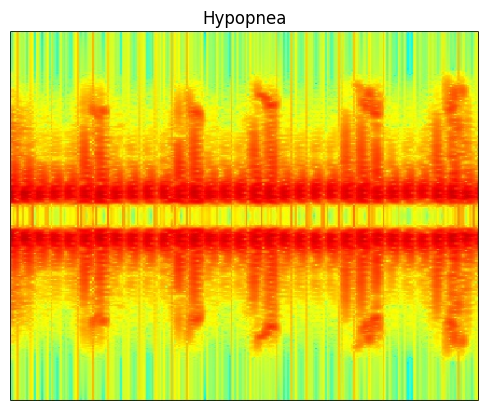

Image shape: (343, 435, 3)


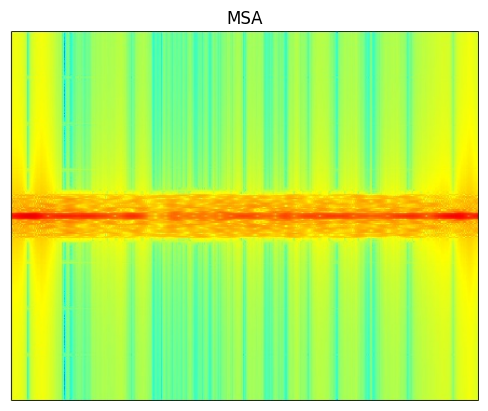

Image shape: (343, 435, 3)


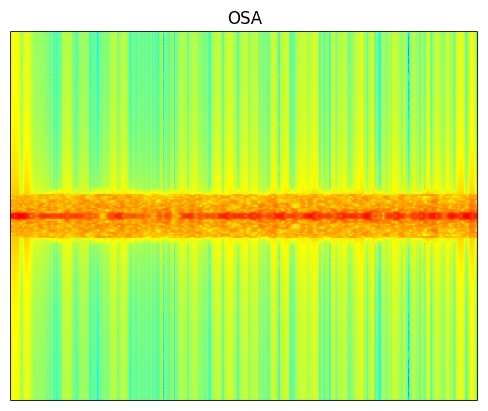

In [ ]:
# View a random image from the training dataset
# a = list(train_data.class_names)
# for i in a:
#   new_path = path + "/train/"
#   view_random_image(new_path ,i)

# ________________________________

In [ ]:
train_m_dir = path +"/HSN_1_train"
test_m_dir = path+"/HSN_1_test"
train_a_dir = path+"/HSA_2_train"
test_a_dir = path+"/HSA_2_test"
H1_test_30_people = "/content/drive/MyDrive/Testing_30_people/H1"
H2_test_30_people = "/content/drive/MyDrive/Testing_30_people/H2"


In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_m_data = tf.keras.preprocessing.image_dataset_from_directory(train_m_dir, # Main Path
                                                                 batch_size=BATCH_SIZE, # many images per batch
                                                                 image_size=IMG_SIZE, # Target size of the image (has to be consistent)
                                                                 label_mode="categorical", # catrgorical data
                                                                 shuffle=True,) # mix

test_m_data = tf.keras.preprocessing.image_dataset_from_directory(test_m_dir, # Main Path
                                                                 batch_size=BATCH_SIZE, # many images per batch
                                                                 image_size=IMG_SIZE, # Target size of the image (has to be consistent)
                                                                 label_mode="categorical", # catrgorical data
                                                                 shuffle=True,) # mix

train_a_data = tf.keras.preprocessing.image_dataset_from_directory(train_a_dir,
                                                                    batch_size = BATCH_SIZE,
                                                                    image_size= IMG_SIZE,
                                                                    label_mode="categorical",
                                                                    shuffle=True)

test_a_data = tf.keras.preprocessing.image_dataset_from_directory(test_a_dir,
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode ="categorical",
                                                                shuffle=True)

H1_test_data = tf.keras.preprocessing.image_dataset_from_directory(H1_test_30_people,
                                                                   image_size = IMG_SIZE,
                                                                   batch_size = BATCH_SIZE,
                                                                   label_mode = "categorical",
                                                                   shuffle = True,
                                                                   )

H2_test_data = tf.keras.preprocessing.image_dataset_from_directory(H2_test_30_people,
                                                                   image_size = IMG_SIZE,
                                                                   batch_size = BATCH_SIZE,
                                                                   label_mode = "categorical",
                                                                   shuffle = True,
                                                                   )



Found 5681 files belonging to 2 classes.
Found 2436 files belonging to 2 classes.
Found 3601 files belonging to 3 classes.
Found 1546 files belonging to 3 classes.
Found 1597 files belonging to 2 classes.
Found 2193 files belonging to 3 classes.


[4305, 1376, 679, 468, 2454]
['Apenea', 'Hypopnea', 'CSA', 'MSA', 'OSA']


/tmp/ipython-input-3712920101.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Training data')


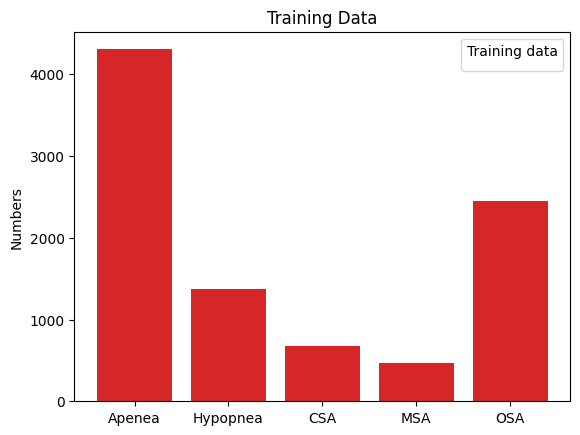

In [ ]:

a = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/train/Apenea/")
h = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/train/Hypopnea//")
c = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/train/CSA/")
m = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/train//MSA/")
o = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/train/OSA/")

sizes = []
n = [a,h,c,m,o]
for i in n:
  sizes.append(len(i))
print(sizes)

train_a_data.class_names
lables = train_m_data.class_names + train_a_data.class_names
print(lables)


import matplotlib.pyplot as plt

fig, ax = plt.subplots()

lables = lables
counts = sizes

bar_colors = ['tab:red']

ax.bar(lables, counts, color=bar_colors)

ax.set_ylabel('Numbers')
ax.set_title('Training Data')
ax.legend(title='Training data')

plt.show()

[1846, 590, 292, 201, 1053]
['Apenea', 'Hypopnea', 'CSA', 'MSA', 'OSA']


/tmp/ipython-input-1365000074.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Testing data')


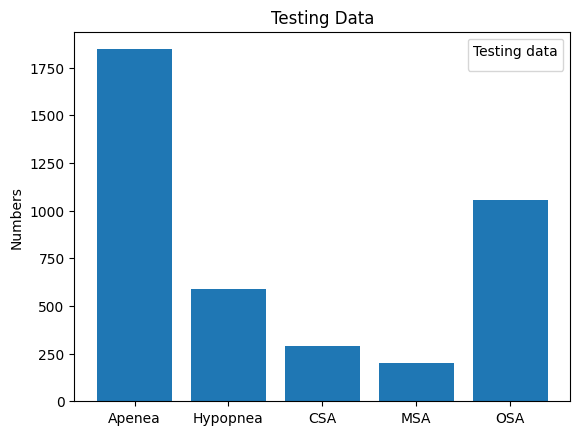

In [ ]:

a = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/test/Apenea/")
h = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/test/Hypopnea//")
c = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/test/CSA/")
m = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/test//MSA/")
o = os.listdir("/content/drive/MyDrive/DeepLearning_data_2type_auto/test/OSA/")

sizes = []
n = [a,h,c,m,o]
for i in n:
  sizes.append(len(i))
print(sizes)

train_a_data.class_names
lables = train_m_data.class_names + train_a_data.class_names
print(lables)


import matplotlib.pyplot as plt

fig, ax = plt.subplots()

lables = lables
counts = sizes

bar_colors = ['tab:blue']

ax.bar(lables, counts, color=bar_colors)

ax.set_ylabel('Numbers')
ax.set_title('Testing Data')
ax.legend(title='Testing data')

plt.show()

[0, 1597, 319, 167, 1707]
['Apenea', 'Hypopnea', 'CSA', 'MSA', 'OSA']


/tmp/ipython-input-3554222508.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Testing data')


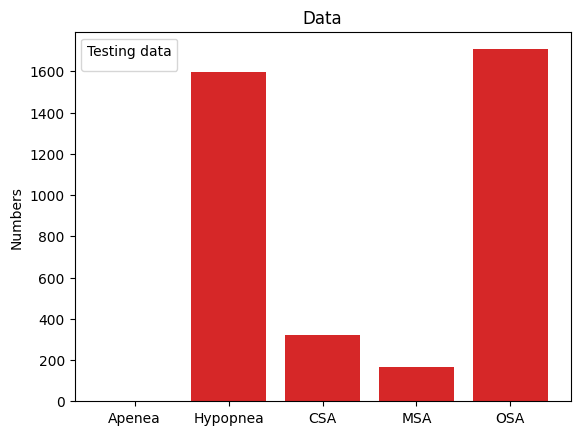

In [ ]:

a = os.listdir("/content/drive/MyDrive/Testing_30_people/H1/Apenea/")
h = os.listdir("/content/drive/MyDrive/Testing_30_people/H1/Hypopnea/")
c = os.listdir("/content/drive/MyDrive/Testing_30_people/H2/CSA/")
m = os.listdir("/content/drive/MyDrive/Testing_30_people/H2/MSA/")
o = os.listdir("/content/drive/MyDrive/Testing_30_people/H2/OSA/")

sizes = []
n = [a,h,c,m,o]
for i in n:
  sizes.append(len(i))
print(sizes)

train_a_data.class_names
lables = train_m_data.class_names + train_a_data.class_names
print(lables)


import matplotlib.pyplot as plt

fig, ax = plt.subplots()

lables = lables
counts = sizes

bar_colors = ['tab:red']

ax.bar(lables, counts, color=bar_colors)

ax.set_ylabel('Numbers')
ax.set_title('Data')
ax.legend(title='Testing data')

plt.show()



[1846, 590, 292, 201, 1053]
['Apenea', 'Hypopnea', 'CSA', 'MSA', 'OSA']


([<matplotlib.patches.Wedge at 0x79c1d9e89220>,
 [Text(0.12556294238241972, 1.092810115024687, 'Apenea'),
  Text(-1.069332711788756, -0.2579293536969087, 'Hypopnea'),
  Text(-0.6553782495443219, -0.883447423463457, 'CSA'),
  Text(-0.271406349422307, -1.065991835565947, 'MSA'),
  Text(0.7417440274281758, -0.8122904639195452, 'OSA')])

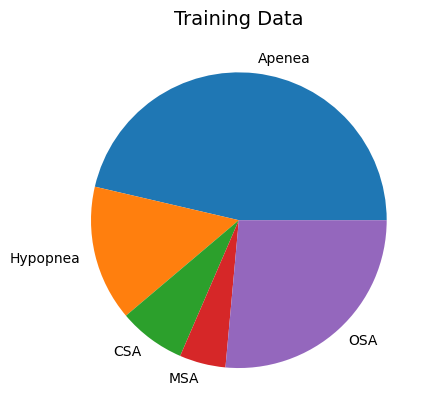

In [ ]:
a = os.listdir(path+ "/HSN_1_test/Apenea")
h = os.listdir(path+ "/HSN_1_test/Hypopnea")
c = os.listdir(path+ "/HSA_2_test/CSA")
m = os.listdir(path+ "/HSA_2_test/MSA")
o = os.listdir(path+ "/HSA_2_test/OSA")

sizes = []
n = [a,h,c,m,o]
for i in n:
  sizes.append(len(i))
print(sizes)

train_a_data.class_names
lables = train_m_data.class_names + train_a_data.class_names
print(lables)


import matplotlib.pyplot as plt

labels = lables
sizes = sizes

fig, ax = plt.subplots()
ax.set_title("Testing Data", fontsize=14, pad=8)
ax.pie(sizes, labels=labels)

"history" usually refers to a record-keeping object that logs the model's performance metrics (like loss and accuracy) at each step or epoch of the training process.

In [ ]:
# # Flow chart
# # input layer -> rescaling -> base_model -> gives feature map -> flattern using globalAveragepooling
# # output layer -> 2 dense layer
# # tf.keras.model(input, output) -> it starts from input and goes to output.

# # this is feature extraction. means all the layers will be frozen during training

# # 1. Create base model with tf.keras.applications
# base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)

# # 2. Freeze the base model (so the pre-learned patterns remain)
# base_model.trainable = False




# # 3. Create inputs into the base model
# inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# # 4. Rescaling
# # x = tf.keras.layers.Rescaling(1./255)(inputs)

# # 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
# x = base_model(inputs)
# # Check data shape after passing it to base_model
# print(f"Shape after base_model: {x.shape}")

# # 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
# # this is feature extration where is what our model learns from base model. it converts 4D to 2D.
# x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
# print(f"After GlobalAveragePooling2D(): {x.shape}")

# # 7. Create the output activation layer
# outputs = tf.keras.layers.Dense(2, activation="softmax", name="output_layer")(x)

# # 8. Combine the inputs with the outputs into a model
# model = tf.keras.Model(inputs, outputs)

# # 9. Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # 10. Fit the model (we use less steps for validation so it's faster)
# history= model.fit(train_data,
#                                  epochs= 3,
#                                  steps_per_epoch=len(train_data),
#                                  validation_data=test_data,
#                                  # Go through less of the validation data so epochs are faster (we want faster experiments!)
#                                  validation_steps=int(0.25 * len(test_data)),
#                                  )

In [ ]:
# model.evaluate(test_data)

In [ ]:
# for layer_numbers, layer in enumerate(model.layers):
  # print(layer_numbers, layer.name)

In [ ]:
# for layer_numbers, layer in enumerate(base_model.layers):
  # print(layer_numbers, layer.name, layer.trainable, layer.trainable_weights)

In [ ]:
# model.summary()

In [ ]:
# base_model.summary()

In [ ]:
def predict_img(img_path, model, train_data):
  """
  Preprocess the image into required shape and size and predicts the class
  """
  img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,244))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  # Our image has 3 dim right now but we need 4 dim and batch size counts as dim (224,224,3)
  img_array = tf.expand_dims(img_array, axis=0) # (1, 244, 244, 3)
  img_array *= (1/.255)
  predict = model.predict(img_array)
  print("Raw prediction:", predict)
  pred_class = tf.argmax(predict, axis=1).numpy()[0]
  print("Predicted class index:", pred_class)
  classname = train_data.class_names
  print("Predicted class : ", classname[pred_class])

# predict_img("/content/drive/MyDrive/DeepLearning_data_2type_auto/HSN_1_train/Apenea/1_4.jpg", model, train_data)


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



def train_MobileNetV2(train_data,
                test_data,
                activation,
                loss_function = "categorical_crossentropy" ,
                trainable:bool=False,
                unfreeze:int = 2,
                rescaling:bool = True,
                output_shape: int = 2,
                file_path=""):

  """
    Create a model and plots the lost-accuracy curve along with the summary of the model

    Parameters:
    - train_data: Training data
    - test_data: Validation data
    - activation: "Any sctivation function"
    - model: Type of model ( keras.application ) you want to run. Default is tf.keras.applications.MobileNetV2
    - training (bool): Whether the base model is trainable. Default is False.
    - rescaling (bool): Whether you need to rescale the data or not (0-1). Default is true
    - epochs (int): Iteration you want to run a model. Default is 2.
    - output_shape (int): Number of classes for the output layer. Default is 2.

    Returns:
    - Model: The compiled model with specified input and output settings.
    """


  METRICIES = [
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.F1Score(name='f1_score', average='weighted')
  ]


  early_stop = EarlyStopping(
      monitor="val_loss",      # or "val_accuracy"
      min_delta=1e-4,          # required improvement to count as “better”
      patience=5,              # epochs to wait with no improvement
      mode="min",              # "min" for loss, "max" for accuracy
      restore_best_weights=True
    )

  ckpt = ModelCheckpoint(
        file_path,
        monitor="val_loss",
        mode="min",
        save_best_only=True,
        verbose=1,
        save_weights_only =  True
    )

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.00001)




# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
  tf.keras.backend.clear_session(
    free_memory=True
  )

# create a base model
  base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = trainable
  print("Base_model: ", base_model)

# This is Fine Tuning
# If trainable is True then we freeze all the layer excpet last 10 layer and change the weights (train) of the layer with our data
  if base_model.trainable:
    for layer in base_model.layers[:-unfreeze]:
      layer.trainable= False

  inputs = tf.keras.layers.Input(shape=(224,224,3), name ="input_layer")
  print(f"Input Layer: ", inputs)

  if rescaling:
    # x = tf.keras.layers.Rescaling(1./255)(inputs)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs, data_format=None)
    x = base_model(x, training=False) # Extract features without updating the weights
    print(f"Rescaling: ",x)
  else:
    x = base_model(inputs, training=False)

  x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
  print("Pooling layer: ",x)

  outputs = tf.keras.layers.Dense(output_shape, activation= activation, name="output_layer")(x)
  print(f"Output layer: ", outputs)

  model = tf.keras.Model(inputs, outputs)

# compile model
  model.compile(loss= loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics= METRICIES)

  return model


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history, title):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(loss))

    # Plot loss
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy '+ title )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Base_model:  <Functional name=mobilenetv2_1.00_224, built=True>
Input Layer:  <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>
Rescaling:  <KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_156>
Pooling layer:  <KerasTensor shape=(None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_157>
Output layer:  <KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_158>
Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1023s 6s/step - accuracy: 0.7498 - f1_score: 0.7385 - loss: 0.6470 - precision: 0.6038 - recall: 0.9121 - val_accuracy: 0.8421 - val_f1_score: 0.8086 - val_loss: 0.3733 - val_precision: 0.8623 - val_recall: 0.8240
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 40s 223ms/step - accuracy: 0.8605 - f1_score: 0.8433 - loss: 0.3544 - precision: 0.8718 - recall: 0.8330 - val_accuracy: 0.8964 - val_f

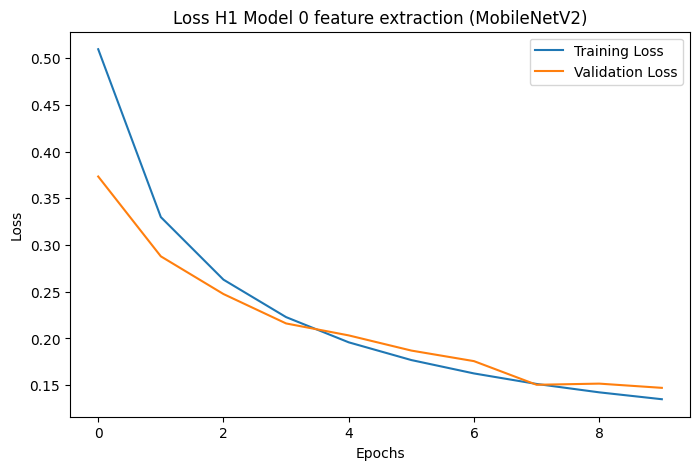

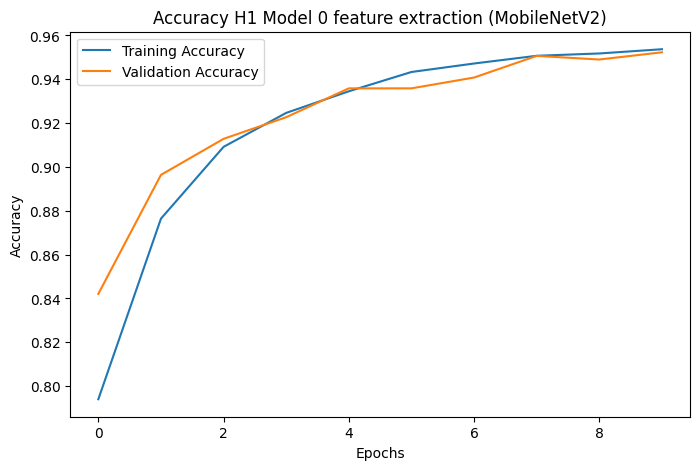

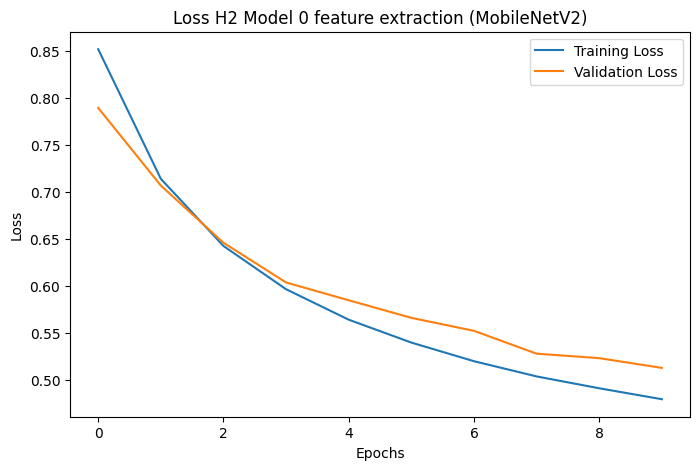

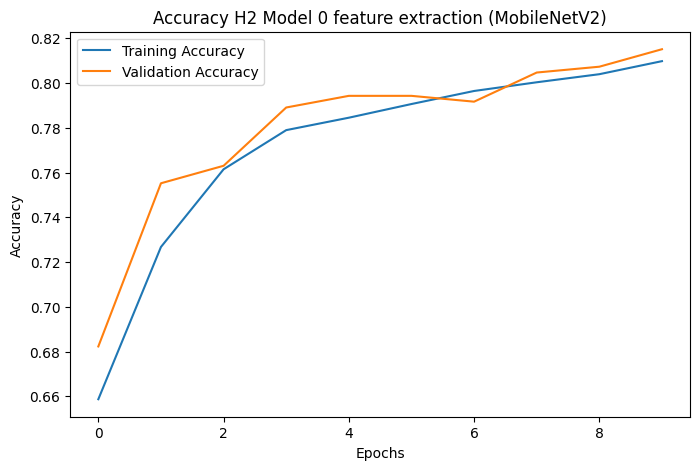

In [ ]:
H1_model_0 = train_MobileNetV2(train_data = train_m_data,
            test_data = test_m_data,
            trainable= False,
            loss_function= "binary_crossentropy",
            activation="sigmoid",
            file_path="0_H1_MobileNetv2_model.weights.h5")

H1_history_0 = H1_model_0.fit(
    train_m_data,
    epochs = 10,
    steps_per_epoch = len(train_m_data),
    validation_data = test_m_data,
    validation_steps = int(0.25* len(test_m_data)),
)

import matplotlib.pyplot as plt

print("Evaluating on Validation data")
H1_model_0.evaluate(test_m_data)
print("Evaluating on Test data of 30 people")
H1_model_0.evaluate(H1_test_data)

H2_model_0 = train_MobileNetV2(train_data = train_a_data,
            test_data = test_a_data,
            trainable= False,
            loss_function= "categorical_crossentropy",
            activation="softmax",
            file_path="0_H2_MobileNetV2_model.weights.h5",
            output_shape=3,
                         )

H2_history_0 = H2_model_0.fit(
    train_a_data,
    epochs = 10,
    steps_per_epoch = len(train_a_data),
    validation_data = test_a_data,
    validation_steps = int(0.25* len(test_a_data)),
)


print("Evaluating on Validation data")
H2_model_0.evaluate(test_a_data)
print("Evaluating on Test data of 30 people")
H2_model_0.evaluate(H2_test_data)


plot_loss_curves(H1_history_0, title= "H1 Model 0 feature extraction (MobileNetV2)")
plot_loss_curves(H2_history_0, title = "H2 Model 0 feature extraction (MobileNetV2)")

Base_model:  <Functional name=mobilenetv2_1.00_224, built=True>
Input Layer:  <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>
Rescaling:  <KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_156>
Pooling layer:  <KerasTensor shape=(None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_157>
Output layer:  <KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_158>
Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 190ms/step - accuracy: 0.7848 - f1_score: 0.7239 - loss: 0.4761 - precision: 0.7909 - recall: 0.7684 - val_accuracy: 0.8783 - val_f1_score: 0.8600 - val_loss: 0.3243 - val_precision: 0.8631 - val_recall: 0.8914
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 27s 150ms/step - accuracy: 0.8947 - f1_score: 0.8850 - loss: 0.3069 - precision: 0.8765 - recall: 0.8971 - val_accuracy: 0.8980 - val_f1_score: 0.8883 - val_loss: 0.2598 - val_precisi

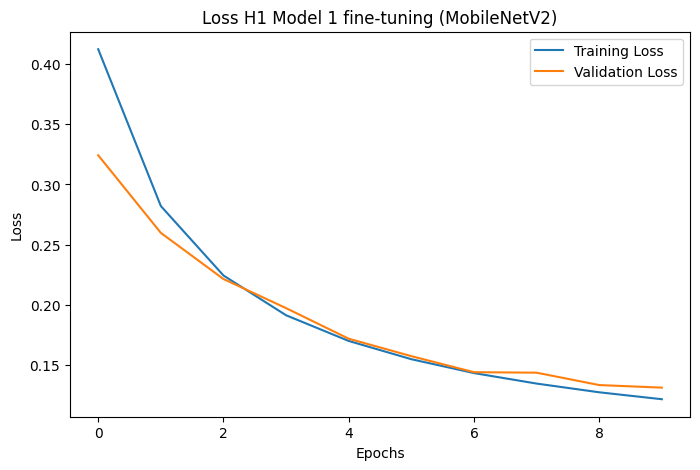

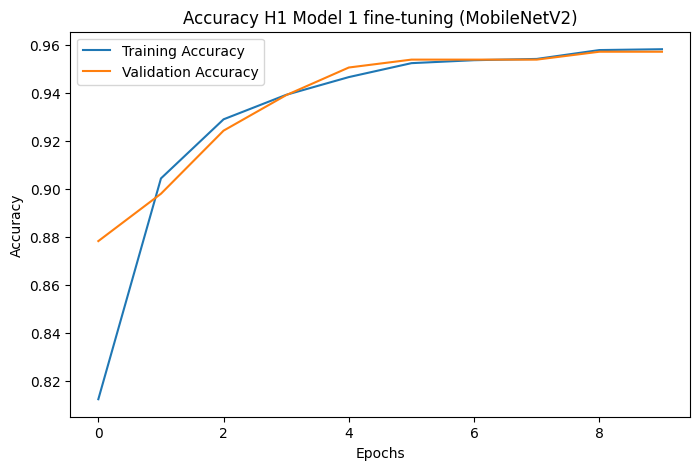

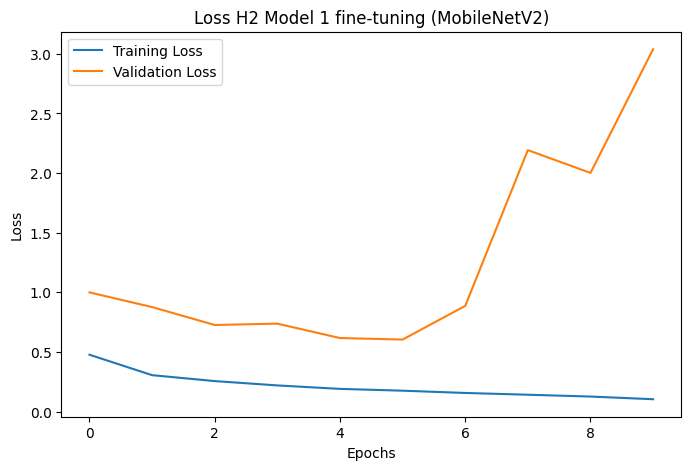

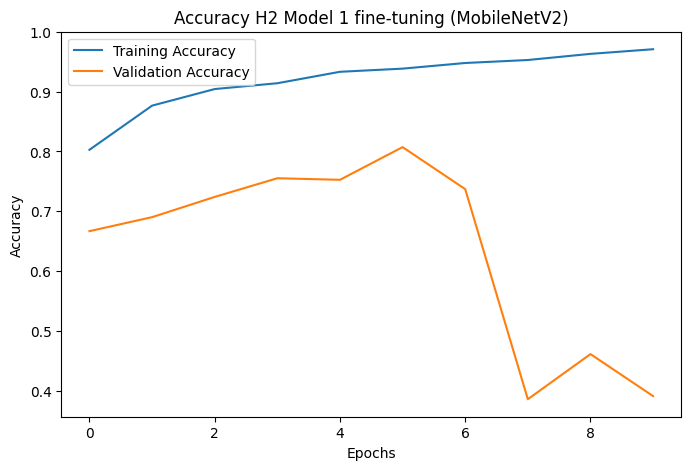

In [ ]:
H1_model_1 = train_MobileNetV2(
    train_data = train_m_data,
            test_data = test_m_data,
            trainable= True,
            loss_function= "binary_crossentropy",
            activation="sigmoid",
            file_path="1_H1_MobileNetV2_model.weights.h5",
            output_shape=2,
            unfreeze= 1
                         )

H1_history_1 = H1_model_1.fit(
    train_m_data,
    epochs = 10,
    steps_per_epoch = len(train_m_data),
    validation_data = test_m_data,
    validation_steps = int(0.25* len(test_m_data)),
)



print("Evaluating on Validation data")
H1_model_1.evaluate(test_m_data)
print("Evaluating on Test data of 30 people")
H1_model_1.evaluate(H1_test_data)

H2_model_1 = train_MobileNetV2(
    rescaling= False,
    train_data = train_a_data,
            test_data = test_a_data,
            trainable= True,
            loss_function= "categorical_crossentropy",
            activation="softmax",
            file_path="1_H2_MobileNetV2_model.weights.h5",
            output_shape=3,
            unfreeze = 5)

H2_history_1 = H2_model_1.fit(
    train_a_data,
    epochs = 10,
    steps_per_epoch = len(train_a_data),
    validation_data = test_a_data,
    validation_steps = int(0.25* len(test_a_data)),
)


print("Evaluating on Validation data")
H2_model_1.evaluate(test_a_data)
print("Evaluating on Test data of 30 people")
H2_model_1.evaluate(H2_test_data)


plot_loss_curves(H1_history_1, title= "H1 Model 1 fine-tuning (MobileNetV2)")
plot_loss_curves(H2_history_1, title="H2 Model 1 fine-tuning (MobileNetV2)")

# New Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



def train_Resnet50(train_data,
                test_data,
                activation,
                loss_function = "categorical_crossentropy" ,
                trainable:bool=False,
                unfreeze:int = 2,
                rescaling:bool = True,
                output_shape: int = 2,
                file_path=""):

  """
    Create a model and plots the lost-accuracy curve along with the summary of the model

    Parameters:
    - train_data: Training data
    - test_data: Validation data
    - activation: "Any sctivation function"
    - model: Type of model ( keras.application ) you want to run. Default is tf.keras.applications.MobileNetV2
    - training (bool): Whether the base model is trainable. Default is False.
    - rescaling (bool): Whether you need to rescale the data or not (0-1). Default is true
    - epochs (int): Iteration you want to run a model. Default is 2.
    - output_shape (int): Number of classes for the output layer. Default is 2.

    Returns:
    - Model: The compiled model with specified input and output settings.
    """


  METRICIES = [
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.F1Score(name='f1_score', average='weighted')
  ]


  early_stop = EarlyStopping(
      monitor="val_loss",      # or "val_accuracy"
      min_delta=1e-4,          # required improvement to count as “better”
      patience=5,              # epochs to wait with no improvement
      mode="min",              # "min" for loss, "max" for accuracy
      restore_best_weights=True
    )

  ckpt = ModelCheckpoint(
        file_path,
        monitor="val_loss",
        mode="min",
        save_best_only=True,
        verbose=1,
        save_weights_only =  True
    )

  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.00001)




# https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
  tf.keras.backend.clear_session(
    free_memory=True
  )

# create a base model
  base_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(224, 224, 3))
  base_model.trainable = trainable
  print("Base_model: ", base_model)

# This is Fine Tuning
# If trainable is True then we freeze all the layer excpet last 10 layer and change the weights (train) of the layer with our data
  if base_model.trainable:
    for layer in base_model.layers[:-unfreeze]:
      layer.trainable= False

  inputs = tf.keras.layers.Input(shape=(224,224,3), name ="input_layer")
  print(f"Input Layer: ", inputs)

  if rescaling:
    # x = tf.keras.layers.Rescaling(1./255)(inputs)
    x = tf.keras.applications.resnet.preprocess_input(inputs, data_format=None)
    x = base_model(x, training=False) # Extract features without updating the weights
    print(f"Rescaling: ",x)
  else:
    x = base_model(inputs, training=False)

  x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
  print("Pooling layer: ",x)

  outputs = tf.keras.layers.Dense(output_shape, activation= activation, name="output_layer")(x)
  print(f"Output layer: ", outputs)

  model = tf.keras.Model(inputs, outputs)

# compile model
  model.compile(loss= loss_function,
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=METRICIES)

  return model


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Base_model:  <Functional name=resnet50, built=True>
Input Layer:  <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>
Rescaling:  <KerasTensor shape=(None, 7, 7, 2048), dtype=float32, sparse=False, ragged=False, name=keras_tensor_180>
Pooling layer:  <KerasTensor shape=(None, 2048), dtype=float32, sparse=False, ragged=False, name=keras_tensor_181>
Output layer:  <KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_182>
Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 50s 205ms/step - accuracy: 0.7768 - f1_score: 0.7267 - loss: 0.4840 - precision: 0.7581 - recall: 0.8310 - val_accuracy: 0.9243 - val_f1_score: 0.9192 - val_loss: 0.2441 - val_precision: 0.9248 - val_recall: 0.9309
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 27s 150ms/step - accuracy: 0.9207 - f1_score: 0.9167 - loss: 0.2272 - precision: 0.9156 - recall: 0.9212 - val_accuracy: 0.9424 - val_f1_score: 

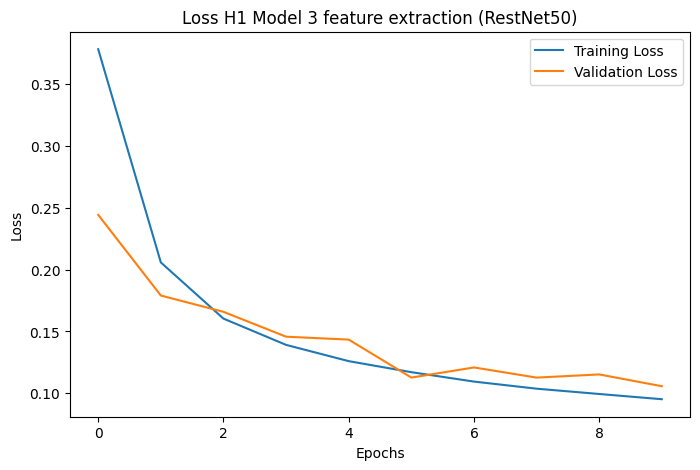

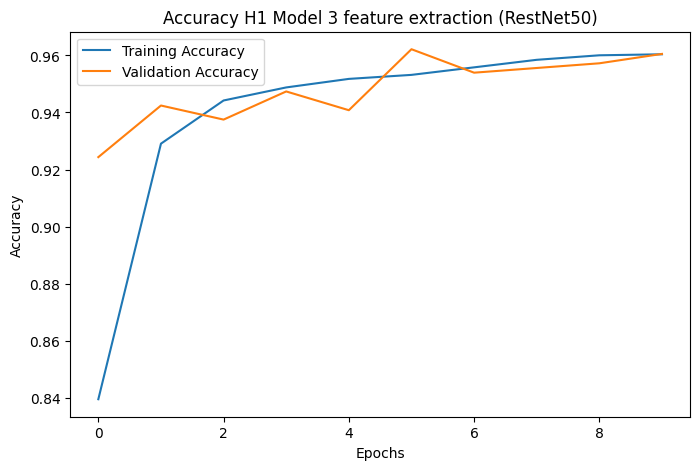

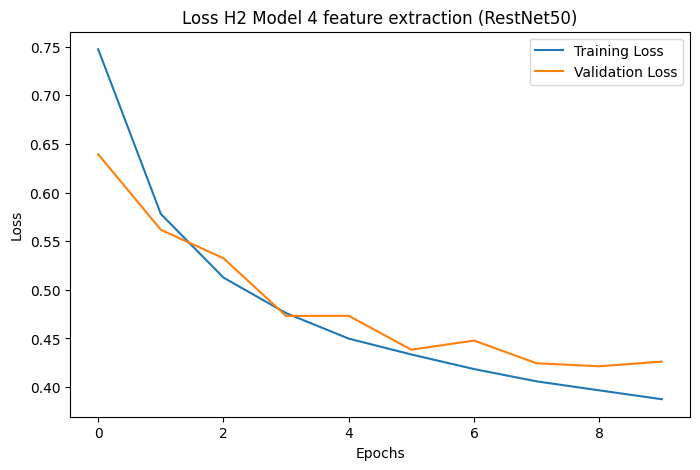

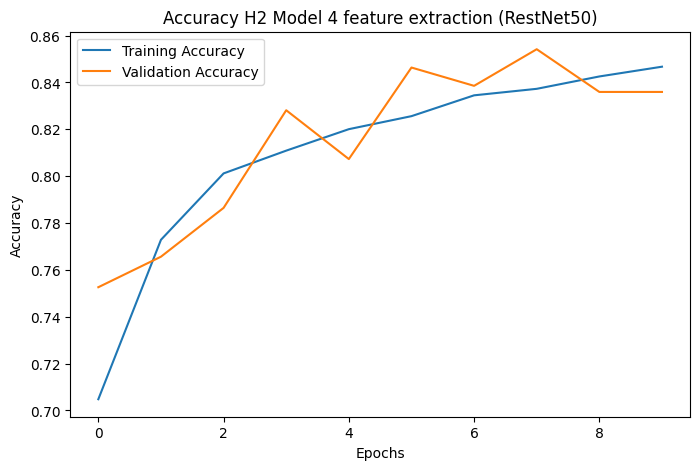

In [ ]:
H1_model_2 = train_Resnet50(train_data = train_m_data,
            test_data = test_m_data,
            trainable= False,
            loss_function= "binary_crossentropy",
            activation="sigmoid",
            file_path="2_H1_Resnet50_model.weights.h5")

H1_history_2 = H1_model_2.fit(
    train_m_data,
    epochs = 10,
    steps_per_epoch = len(train_m_data),
    validation_data = test_m_data,
    validation_steps = int(0.25* len(test_m_data)),
)

import matplotlib.pyplot as plt


print("Evaluating on Validation data")
H1_model_2.evaluate(test_m_data)
print("Evaluating on Test data of 30 people")
H1_model_2.evaluate(H1_test_data)

print("-----------------------------------------------")

H2_model_2 = train_Resnet50(train_data = train_a_data,
            test_data = test_a_data,
            trainable= False,
            loss_function= "categorical_crossentropy",
            activation="softmax",
            file_path="4_H1_MobileNetv2_model.weights.h5",
                            output_shape= 3 )


H2_history_2 = H2_model_2.fit(
    train_a_data,
    epochs = 10,
    steps_per_epoch = len(train_a_data),
    validation_data = test_a_data,
    validation_steps = int(0.25* len(test_a_data)),

)

import matplotlib.pyplot as plt

print("Evaluating on Validation data")
H2_model_2.evaluate(test_a_data)
print("Evaluating on Test data of 30 people")
H2_model_2.evaluate(H2_test_data)

plot_loss_curves(H1_history_2, title="H1 Model 3 feature extraction (RestNet50)")
plot_loss_curves(H2_history_2, title="H2 Model 4 feature extraction (RestNet50)")

Base_model:  <Functional name=resnet50, built=True>
Input Layer:  <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>
Rescaling:  <KerasTensor shape=(None, 7, 7, 2048), dtype=float32, sparse=False, ragged=False, name=keras_tensor_180>
Pooling layer:  <KerasTensor shape=(None, 2048), dtype=float32, sparse=False, ragged=False, name=keras_tensor_181>
Output layer:  <KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_182>
Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.6602 - f1_score: 0.6496 - loss: 0.6933 - precision: 0.7204 - recall: 0.5333 - val_accuracy: 0.9079 - val_f1_score: 0.9002 - val_loss: 0.2772 - val_precision: 0.8748 - val_recall: 0.9194
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 26s 145ms/step - accuracy: 0.9162 - f1_score: 0.9111 - loss: 0.2484 - precision: 0.9001 - recall: 0.9294 - val_accuracy: 0.9293 - val_f1_score: 0.9255 - val_loss: 0.2028 - val_precision: 0.9142 -

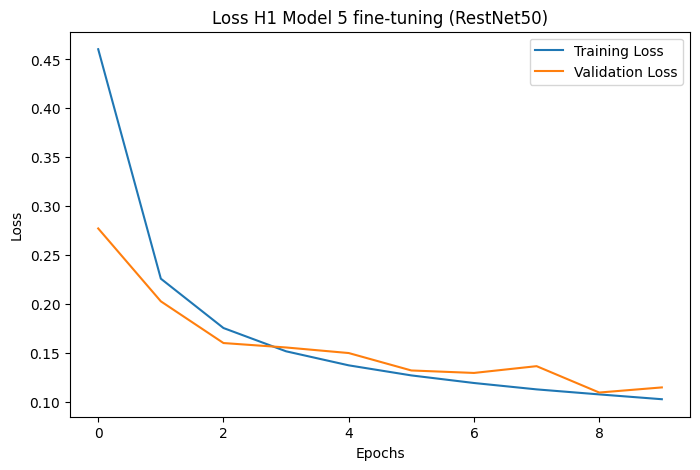

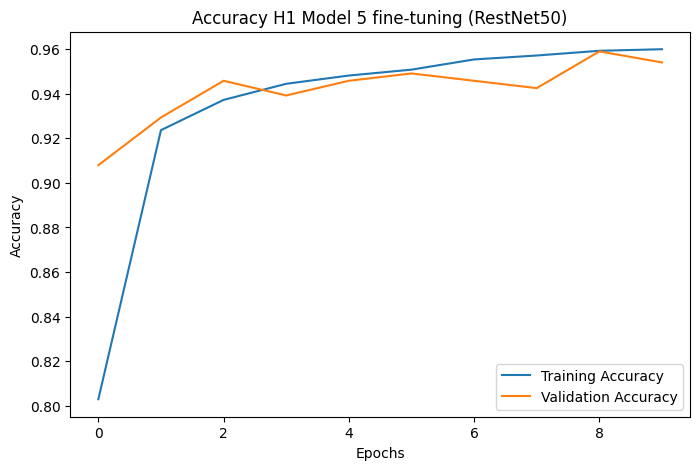

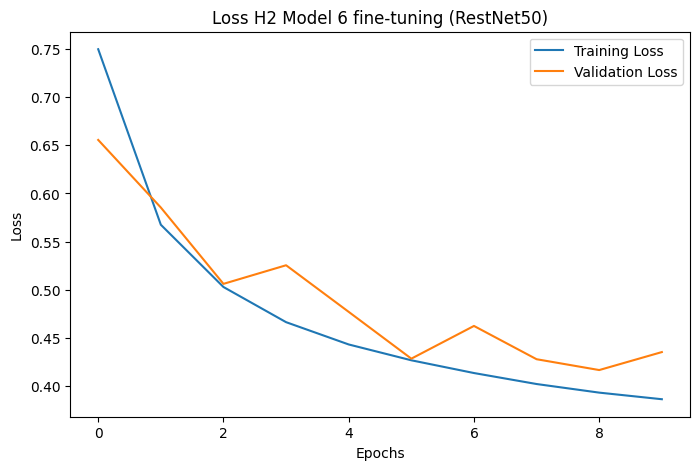

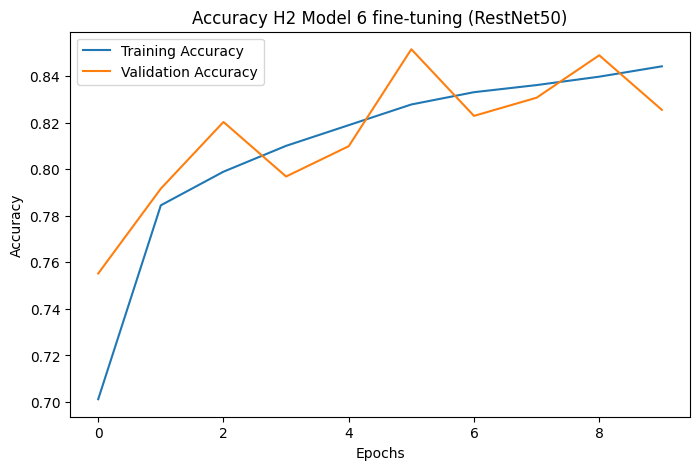

In [ ]:
H1_model_3 = train_Resnet50(train_data = train_m_data,
            test_data = test_m_data,
            trainable= True,
            loss_function= "binary_crossentropy",
            activation="sigmoid",
            file_path="5_H1_Resnet50_model.weights.h5",unfreeze= 1)

H1_history_3 = H1_model_3.fit(
    train_m_data,
    epochs = 10,
    steps_per_epoch = len(train_m_data),
    validation_data = test_m_data,
    validation_steps = int(0.25* len(test_m_data)),
)




print("Evaluating on Validation data")
H1_model_3.evaluate(test_m_data)
print("Evaluating on Test data of 30 people")
H1_model_3.evaluate(H1_test_data)

print("-----------------------------------------------")

H2_model_3 = train_Resnet50(train_data = train_a_data,
            test_data = test_a_data,
            trainable= True,
            loss_function= "categorical_crossentropy",
            activation="softmax",
            file_path="6_H1_MobileNetv2_model.weights.h5",
                            output_shape= 3)


H2_history_3 = H2_model_3.fit(
    train_a_data,
    epochs = 10,
    steps_per_epoch = len(train_a_data),
    validation_data = test_a_data,
    validation_steps = int(0.25* len(test_a_data)),

)



print("Evaluating on Validation data")
H2_model_3.evaluate(test_a_data)
print("Evaluating on Test data of 30 people")
H2_model_3.evaluate(H2_test_data)

plot_loss_curves(H1_history_3, title="H1 Model 5 fine-tuning (RestNet50)")
plot_loss_curves(H2_history_3, title="H2 Model 6 fine-tuning (RestNet50)")

In [ ]:
def confusion_matrix(model, train_data,test_data):
  pred_probs = model.predict(test_data, verbose = 1)
  print(len(pred_probs))
  print(pred_probs.shape)

  pred_classes = pred_probs.argmax(axis=1)
  pred_classes[:10]
  y_label = []
  for images , labels in test_data.unbatch():
    y_label.append(labels.numpy().argmax())
  y_label[:10]
  len(y_label)
  train_data.class_names
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.metrics import confusion_matrix

  # Compute confusion matrix
  cm = confusion_matrix(y_label, pred_classes)

  # Plot confusion matrix
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=train_data.class_names,
              yticklabels=train_data.class_names)

  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()


In [ ]:
confusion_matrix(H1_model_0,train_m_data, H1_test_data)
confusion_matrix(H2_model_0,train_a_data, H2_test_data)

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step
1597
(1597, 2)


ValueError: Found input variables with inconsistent numbers of samples: [5681, 1597]

50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step
1597
(1597, 2)


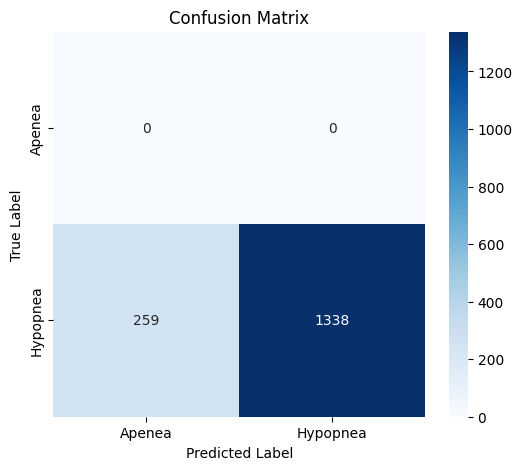

69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step
2193
(2193, 3)


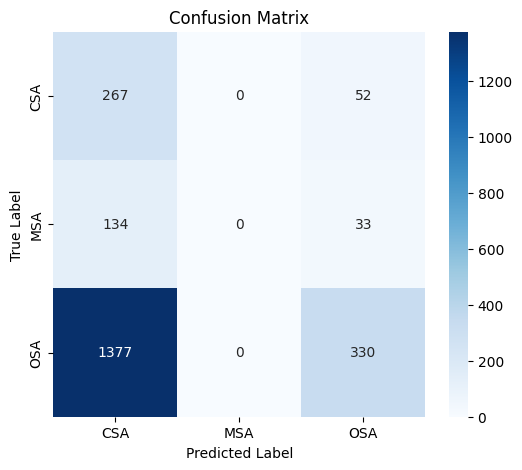

In [ ]:
confusion_matrix(H1_model_1,train_m_data, H1_test_data)
confusion_matrix(H2_model_1,train_a_data, H2_test_data)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step
1597
(1597, 2)


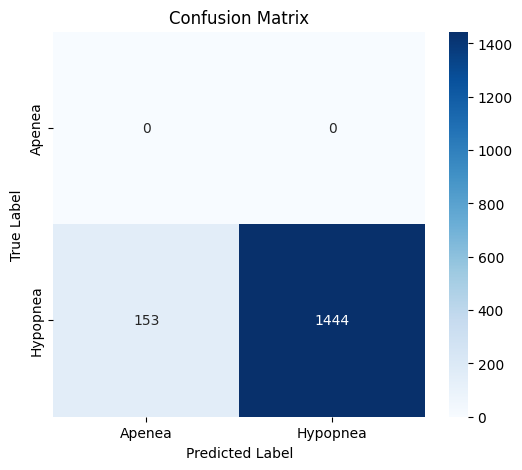

69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step
2193
(2193, 3)


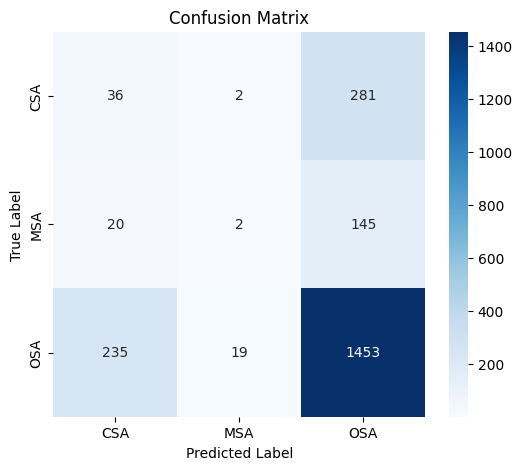

In [ ]:
confusion_matrix(H1_model_2,train_m_data, H1_test_data)
confusion_matrix(H2_model_2,train_a_data, H2_test_data)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step
1597
(1597, 2)


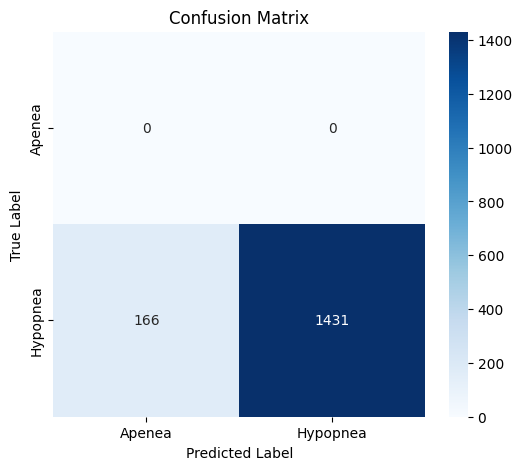

69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 181ms/step
2193
(2193, 3)


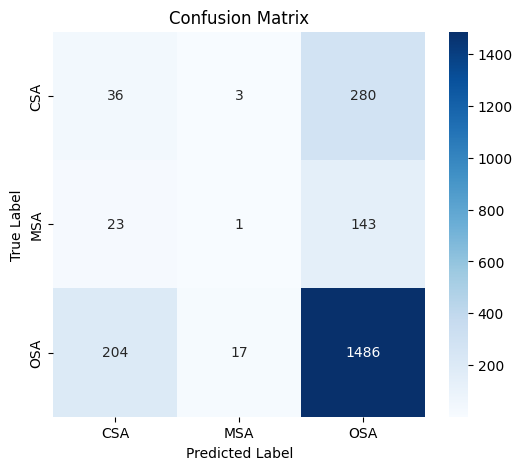

In [ ]:
confusion_matrix(H1_model_3,train_m_data, H1_test_data)
confusion_matrix(H2_model_3,train_a_data, H2_test_data)

In [ ]:
H1_model_2.save("/content/drive/MyDrive/DeepLearning_data_2type_auto/models/H1_model.keras")
H2_model_2.save("/content/drive/MyDrive/DeepLearning_data_2type_auto/models/H2_model.keras")

In [ ]:
pred_probs = H1_model_0.predict(test_m_data, verbose = 1)

77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step


In [ ]:
print(len(pred_probs))
print(pred_probs.shape)

2436
(2436, 2)


In [ ]:
pred_probs[0]

array([0.9898303, 0.0212635], dtype=float32)

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_label = []
for images , labels in test_m_data.unbatch():
  y_label.append(labels.numpy().argmax())
y_label[:10]

[np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0)]

In [ ]:
len(y_label)

2436

In [ ]:
train_m_data.class_names

['Apenea', 'Hypopnea']

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_label, pred_classes,)

array([[1449,  397],
       [ 462,  128]])

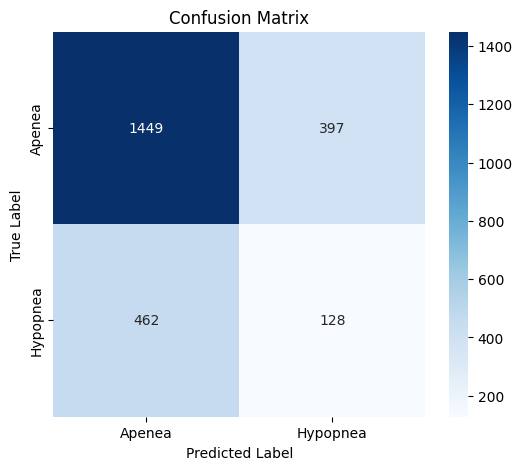

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_label, pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_m_data.class_names,
            yticklabels=train_m_data.class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step
2436
(1546, 3)


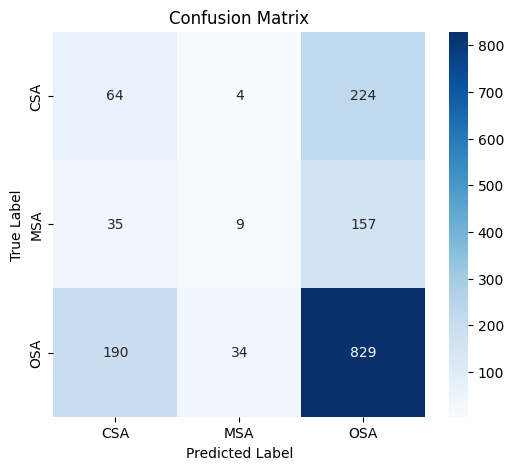

In [ ]:
pred_probs_2 = H2_model_0.predict(test_a_data, verbose = 1)
print(len(pred_probs))
print(pred_probs_2.shape)
pred_probs_2[0]
pred_classes = pred_probs_2.argmax(axis=1)
pred_classes[:10]
y_label = []
for images , labels in test_a_data.unbatch():
  y_label.append(labels.numpy().argmax())
y_label[:10]
len(y_label)
train_a_data.class_names
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_label, pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_a_data.class_names,
            yticklabels=train_a_data.class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import tensorflow as tf
load_H1_model = tf.keras.models.load_model("/content/drive/MyDrive/DeepLearning_data_2type_auto/models/H1_model.keras")
load_H2_model = tf.keras.models.load_model("/content/drive/MyDrive/DeepLearning_data_2type_auto/models/H2_model.keras")


In [ ]:
load_H1_model.summary()
load_H2_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 2)         │      4,098 │ global_average_p… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,600,008 (90.03 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 8,198 (32.03 KB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer[0][0] │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 3)         │      6,147 │ global_average_p… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,606,155 (90.05 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 12,296 (48.04 KB)

77/77 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step
2436
(2436, 2)


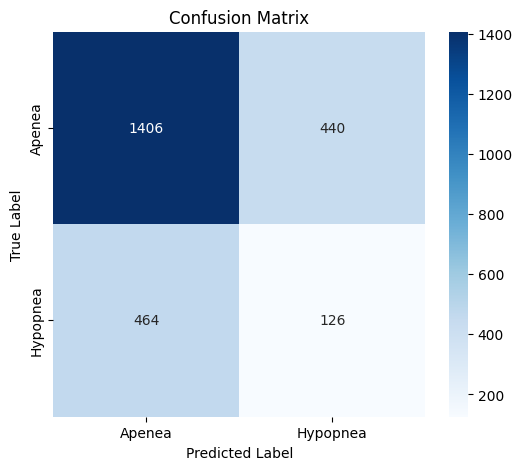

49/49 ━━━━━━━━━━━━━━━━━━━━ 534s 11s/step
1546
(1546, 3)


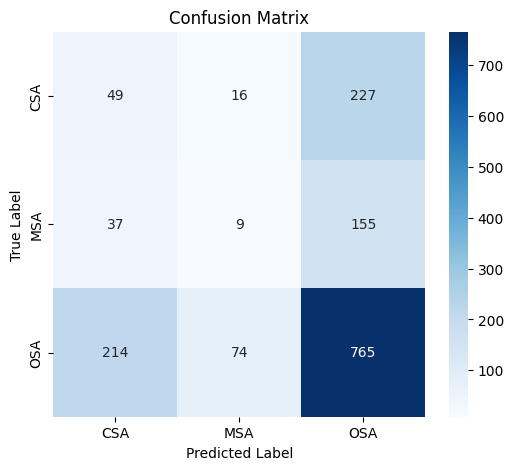

In [ ]:
confusion_matrix(load_H1_model, train_m_data, test_m_data)
confusion_matrix(load_H2_model, train_a_data, test_a_data)


In [ ]:
for xb, yb in train_a_data.take(1):
    # ensure it's float32
    # xb = tf.cast(xb, tf.float32)
    # apply the same preprocessing manually
    print(xb)
    xb_p = tf.keras.applications.mobilenet_v2.preprocess_input(xb)
    print(xb_p)

    print("Before preprocess  min/max:", tf.reduce_min(xb).numpy(), tf.reduce_max(xb).numpy())
    print("After  preprocess  min/max:", tf.reduce_min(xb_p).numpy(), tf.reduce_max(xb_p).numpy())

In [ ]:
# Final model

In [ ]:
import zipfile
import os

url = "https://github.com/poudelef/Datasets/raw/refs/heads/main/DeepLearning_data_2type_auto-20251122T031133Z-1-001.zip?download="

!wget $url -O dataset.zip

with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("data")

print("Extracted files:", os.listdir("data"))

In [ ]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

Train = "/content/data/DeepLearning_data_2type_auto/train"
Test = "/content/data/DeepLearning_data_2type_auto/test"

In [ ]:

IMG_SIZE = (224,224)
BATCH_SIZE = 32


train_data = tf.keras.preprocessing.image_dataset_from_directory(Train,
                                                                    batch_size = BATCH_SIZE,
                                                                    image_size= IMG_SIZE,
                                                                    label_mode="categorical",
                                                                    shuffle=True)



test_data = tf.keras.preprocessing.image_dataset_from_directory(Test,
                                                                    batch_size = BATCH_SIZE,
                                                                    image_size= IMG_SIZE,
                                                                    label_mode="categorical",
                                                                    shuffle=True)


In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("data/DeepLearning_data_2type_auto/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

In [ ]:
def count_images_in_subfolders(root_directory):
    """
    Counts the number of image files in each subfolder of a given root directory.

    Args:
        root_directory (str): The path to the starting directory.

    Returns:
        dict: A dictionary where keys are subfolder paths and values are the
              number of image files found in that subfolder.
    """
    image_extensions = ('.jpg', '.jpeg', '.png')
    image_counts = {}

    for dirpath, dirnames, filenames in os.walk(root_directory):
        count = 0
        for filename in filenames:
            if filename.lower().endswith(image_extensions):
                count += 1
        image_counts[dirpath] = count

    return image_counts

print(count_images_in_subfolders("/content/data/DeepLearning_data_2type_auto/train"))

print(count_images_in_subfolders("/content/data/DeepLearning_data_2type_auto/test"))


In [ ]:
def confusion_matrix(model, train_data,test_data):
  pred_probs = model.predict(test_data, verbose = 1)
  print(len(pred_probs))
  print(pred_probs.shape)

  pred_classes = pred_probs.argmax(axis=1)
  pred_classes[:10]
  y_label = []
  for images , labels in test_data.unbatch():
    y_label.append(labels.numpy().argmax())
  y_label[:10]
  len(y_label)
  train_data.class_names
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.metrics import confusion_matrix

  # Compute confusion matrix
  cm = confusion_matrix(y_label, pred_classes)

  # Plot confusion matrix
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=train_data.class_names,
              yticklabels=train_data.class_names)

  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history, title):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(loss))

    # Plot loss
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Loss ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Accuracy '+ title )
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
class_weights_H1 = {
    0: 0.6598,   # Apenea  (index 0)
    1: 2.0643    # Hypopnea (index 1)
}

class_weights_H2 = {
    0: 1.8325,   # CSA       (index 0)
    1: 0.9043,   # Hypopnea  (index 1)
    2: 3,   # MSA       (index 2)
    3: 0.5070    # OSA       (index 3)
}


In [ ]:
# First _model 
def build_and_train_resnet50(
    train_ds, val_ds,
    num_classes,
    label_mode="categorical",         # or "sparse"
    unfreeze_blocks=2,                # 1 -> conv5_, 2 -> conv5_ + conv4_
    warmup_epochs=5,
    finetune_epochs=5,
    base_lr=1e-3,
    ft_lr=1e-5,
    ckpt_path="/content/drive/MyDrive/H1_best.keras",
    use_label_smoothing=True,
    class_weight=None                 # <- pass through to both phases
):
    # --- Backbone
    base = tf.keras.applications.resnet.ResNet50(include_top=False, input_shape=(224,224,3))
    print("Base: ",base)
    base.trainable = False

    # --- Model graph
    inputs = tf.keras.Input((224,224,3))
    print("Input: ", inputs)
    x = tf.keras.applications.resnet.preprocess_input(inputs)
    print("Renet Preprocess: ", x)
    x = base(x, training=False)                 # keep BN in inference
    print("Sending Preprocess to Frozen layer: ", x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    print("GlobalAveragePooling2D: ",x)
    x = tf.keras.layers.Dropout(0.5)(x)
    print("Dropout: ", x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    print("Dense layer 256: ", x)
    x = tf.keras.layers.BatchNormalization()(x)
    print("BatchNormalization: ", x)
    x = tf.keras.layers.Dropout(0.3)(x)
    print("Dropout: ", x)
    act = "softmax" if (label_mode=="categorical" and num_classes>1) else ("sigmoid" if num_classes==1 else "softmax")
    outputs = tf.keras.layers.Dense(num_classes, activation=act)(x)
    print("Output layer: ",outputs)
    model = tf.keras.Model(inputs, outputs)
    print("Model: ", model)

    # --- Loss + metrics
    if label_mode == "categorical":
        loss = tf.keras.losses.CategoricalCrossentropy(
            label_smoothing=0.1 if use_label_smoothing else 0.0
        )
        acc_metric = tf.keras.metrics.CategoricalAccuracy(name="accuracy")
    else:
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc_metric = tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")

    # F1 can be version-dependent; if it errors, remove it or use tf-addons.
    metrics = [acc_metric, tf.keras.metrics.F1Score(average="weighted")]

    # --- Callbacks
    cbs = [
        tf.keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only=True, monitor="val_loss"),
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, monitor="val_loss"),
        tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, min_lr=1e-6, monitor="val_loss"),
    ]

    # --- Phase 1: warmup head
    model.compile(
        optimizer=tf.keras.optimizers.AdamW(learning_rate=base_lr, weight_decay=1e-4),
        loss=loss, metrics=metrics
    )
    warmup_hist = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=warmup_epochs,
        callbacks=cbs,
        class_weight=class_weight
    )

    # --- Phase 2: unfreeze top blocks
    # Unfreeze conv5_ (and conv4_ if unfreeze_blocks==2)
    for layer in base.layers:
        if any(tag in layer.name for tag in [f"conv5_", f"conv4_"][:unfreeze_blocks]):
            layer.trainable = True

    model.compile(
        optimizer=tf.keras.optimizers.AdamW(learning_rate=ft_lr, weight_decay=1e-4),
        loss=loss, metrics=metrics
    )
    finetune_hist = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=finetune_epochs,
        callbacks=cbs,
        class_weight=class_weight
    )

    return model, {"warmup": warmup_hist, "finetune": finetune_hist}


In [ ]:
Model, Histories = build_and_train_resnet50(
    train_ds=train_data,
    val_ds=test_data,
    label_mode="categorical",
    num_classes=4,
    class_weight=class_weights_H2,   # if you computed it
    #ckpt_path="/content/drive/MyDrive/H2_best.keras",
)



confusion_matrix(model=Model, test_data=test_data, train_data=train_data)


plot_loss_curves(Histories["warmup"], "H2 Warm-up")
plot_loss_curves(Histories["finetune"], "Fine-tuning")

In [ ]:
Results = Model.evaluate(test_data)
print(Results)
print('Accuracy :', Results[1])
print('F1_Score :', Results[2])
print('Loss :', Results[0])